In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from nn_analysis import metrics as me
from nn_analysis import models as md
from nn_analysis import acts as ac
from nn_analysis import utils
from nn_analysis import plot as pt
from nn_analysis.constants import ACTS_CONFIGS_PATH

acts_configs = utils.load_config(ACTS_CONFIGS_PATH)

In [3]:
embedding_names = [
    'cam_pos_x',
    'cam_pos_y',
    'cam_scale',
    'brightness',
    'contrast',
    'saturation',
    'hue',
]

In [16]:
model_name = 'barlow_P_projector'
arch = 'equivariant_all_bn'
epoch = 82
path = 'checkpoints/barlowtwins/equivariant_all_bn_v2_projector'
acts_name = 'mkturk_test'
acts_version = 1
layer = -1
layer_name = utils.get_layer_names(model_name, layer)

acts = ac.utils.load_data(model_name, epoch, acts_name, acts_version, layer_name=layer_name, data_type='y')
model = md.get_custom_model(arch=arch, epoch=epoch, path=path)
embedding = model.state_dict()['embedding'].numpy()

print(embedding.shape)
print(acts.shape)

sub_acts = np.einsum('ijl,kl->ijk',acts, embedding)
print(sub_acts.shape)

Missing keys: []
Unexpected keys: []
(7, 8192)
(18, 24, 8192)
(18, 24, 7)


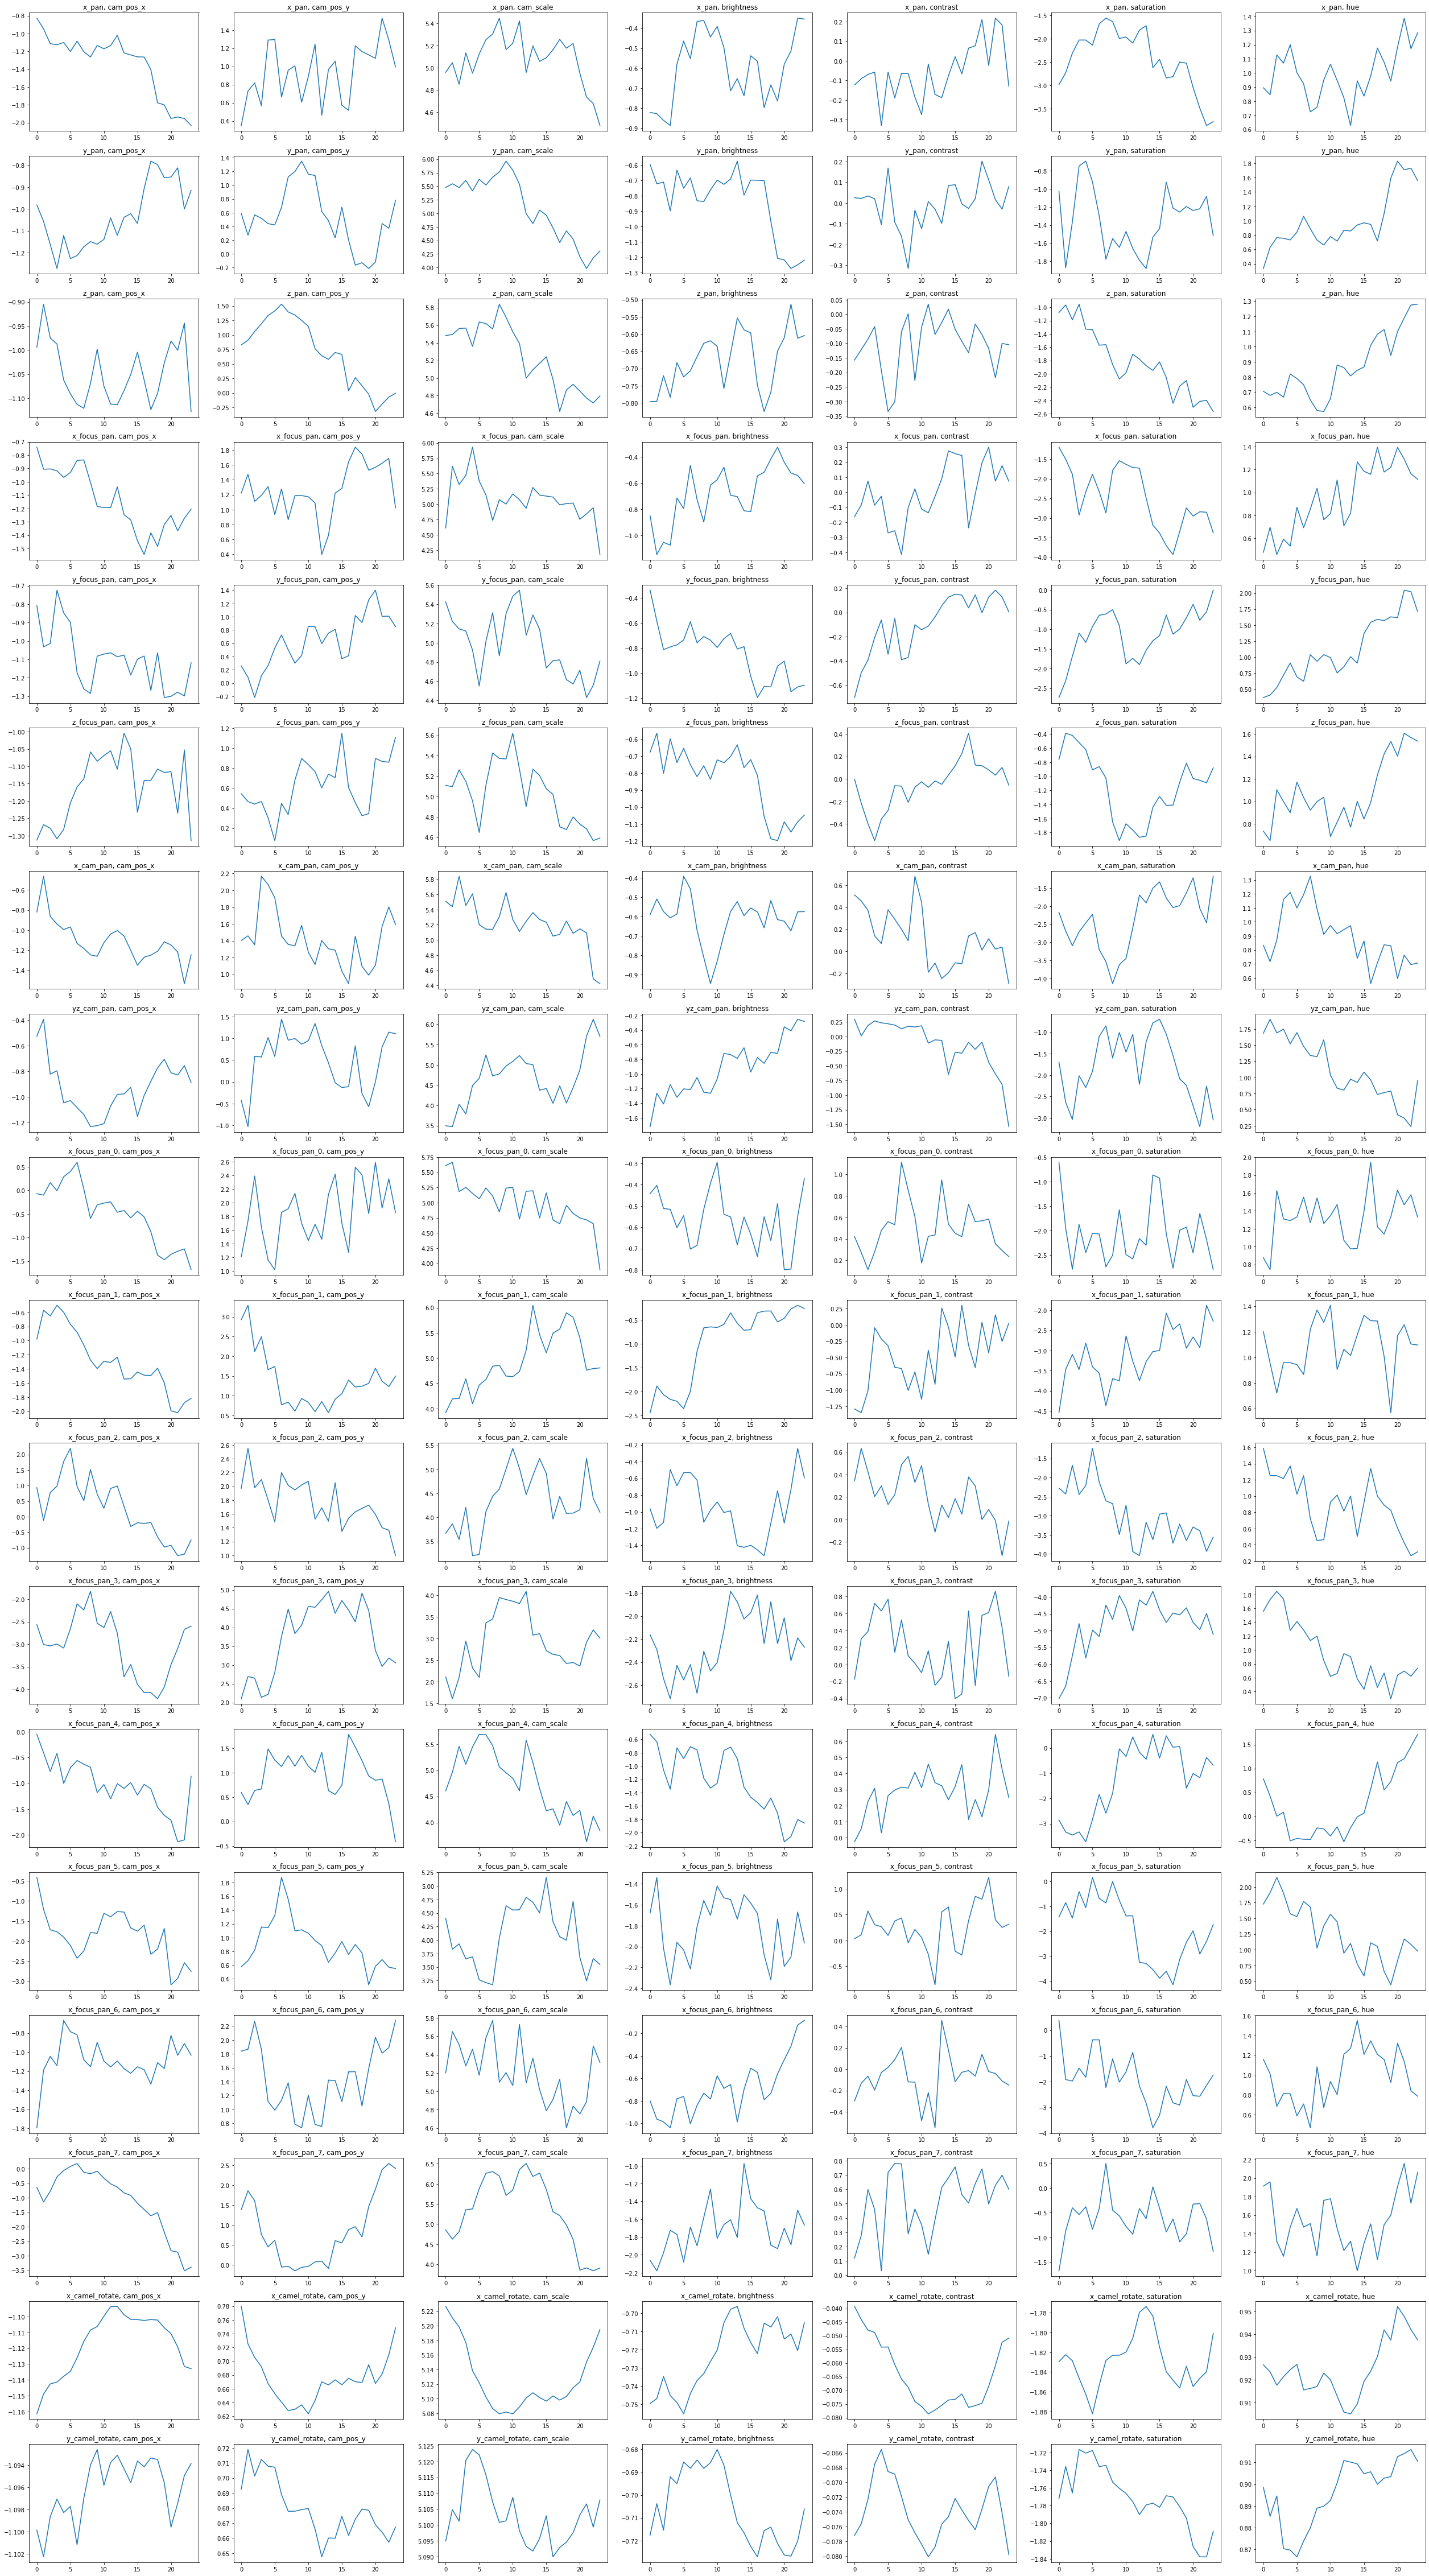

In [18]:
fig, axes = pt.core.subplots(sub_acts.shape[0], sub_acts.shape[-1], (5,3.5))
for i in range(sub_acts.shape[0]):
      for j in range(sub_acts.shape[-1]):
            axes[i,j].plot(np.arange(sub_acts.shape[1]),sub_acts[i,:,j])
            axes[i,j].set_title(f"{acts_configs['mkturk_test']['01']['target_names'][i]}, {embedding_names[j]}")
plt.tight_layout()
plt.show()

In [22]:
model_name = 'barlow_control_projector'
arch = 'barlowtwins'
epoch = 54
path = 'checkpoints/barlowtwins/original_v2_projector'
acts_name = 'mkturk_test'
acts_version = 1
layer = -1
layer_name = utils.get_layer_names(model_name, layer)

acts = ac.utils.load_data(model_name, epoch, acts_name, acts_version, layer_name=layer_name, data_type='y')
model = md.get_custom_model(arch=arch, epoch=epoch, path=path)
# embedding = model.state_dict()['embedding'].numpy() # use barlow_P embedding

print(embedding.shape)
print(acts.shape)

sub_acts = np.einsum('ijl,kl->ijk',acts, embedding)
print(sub_acts.shape)

Missing keys: []
Unexpected keys: []
(7, 8192)
(18, 24, 8192)
(18, 24, 7)


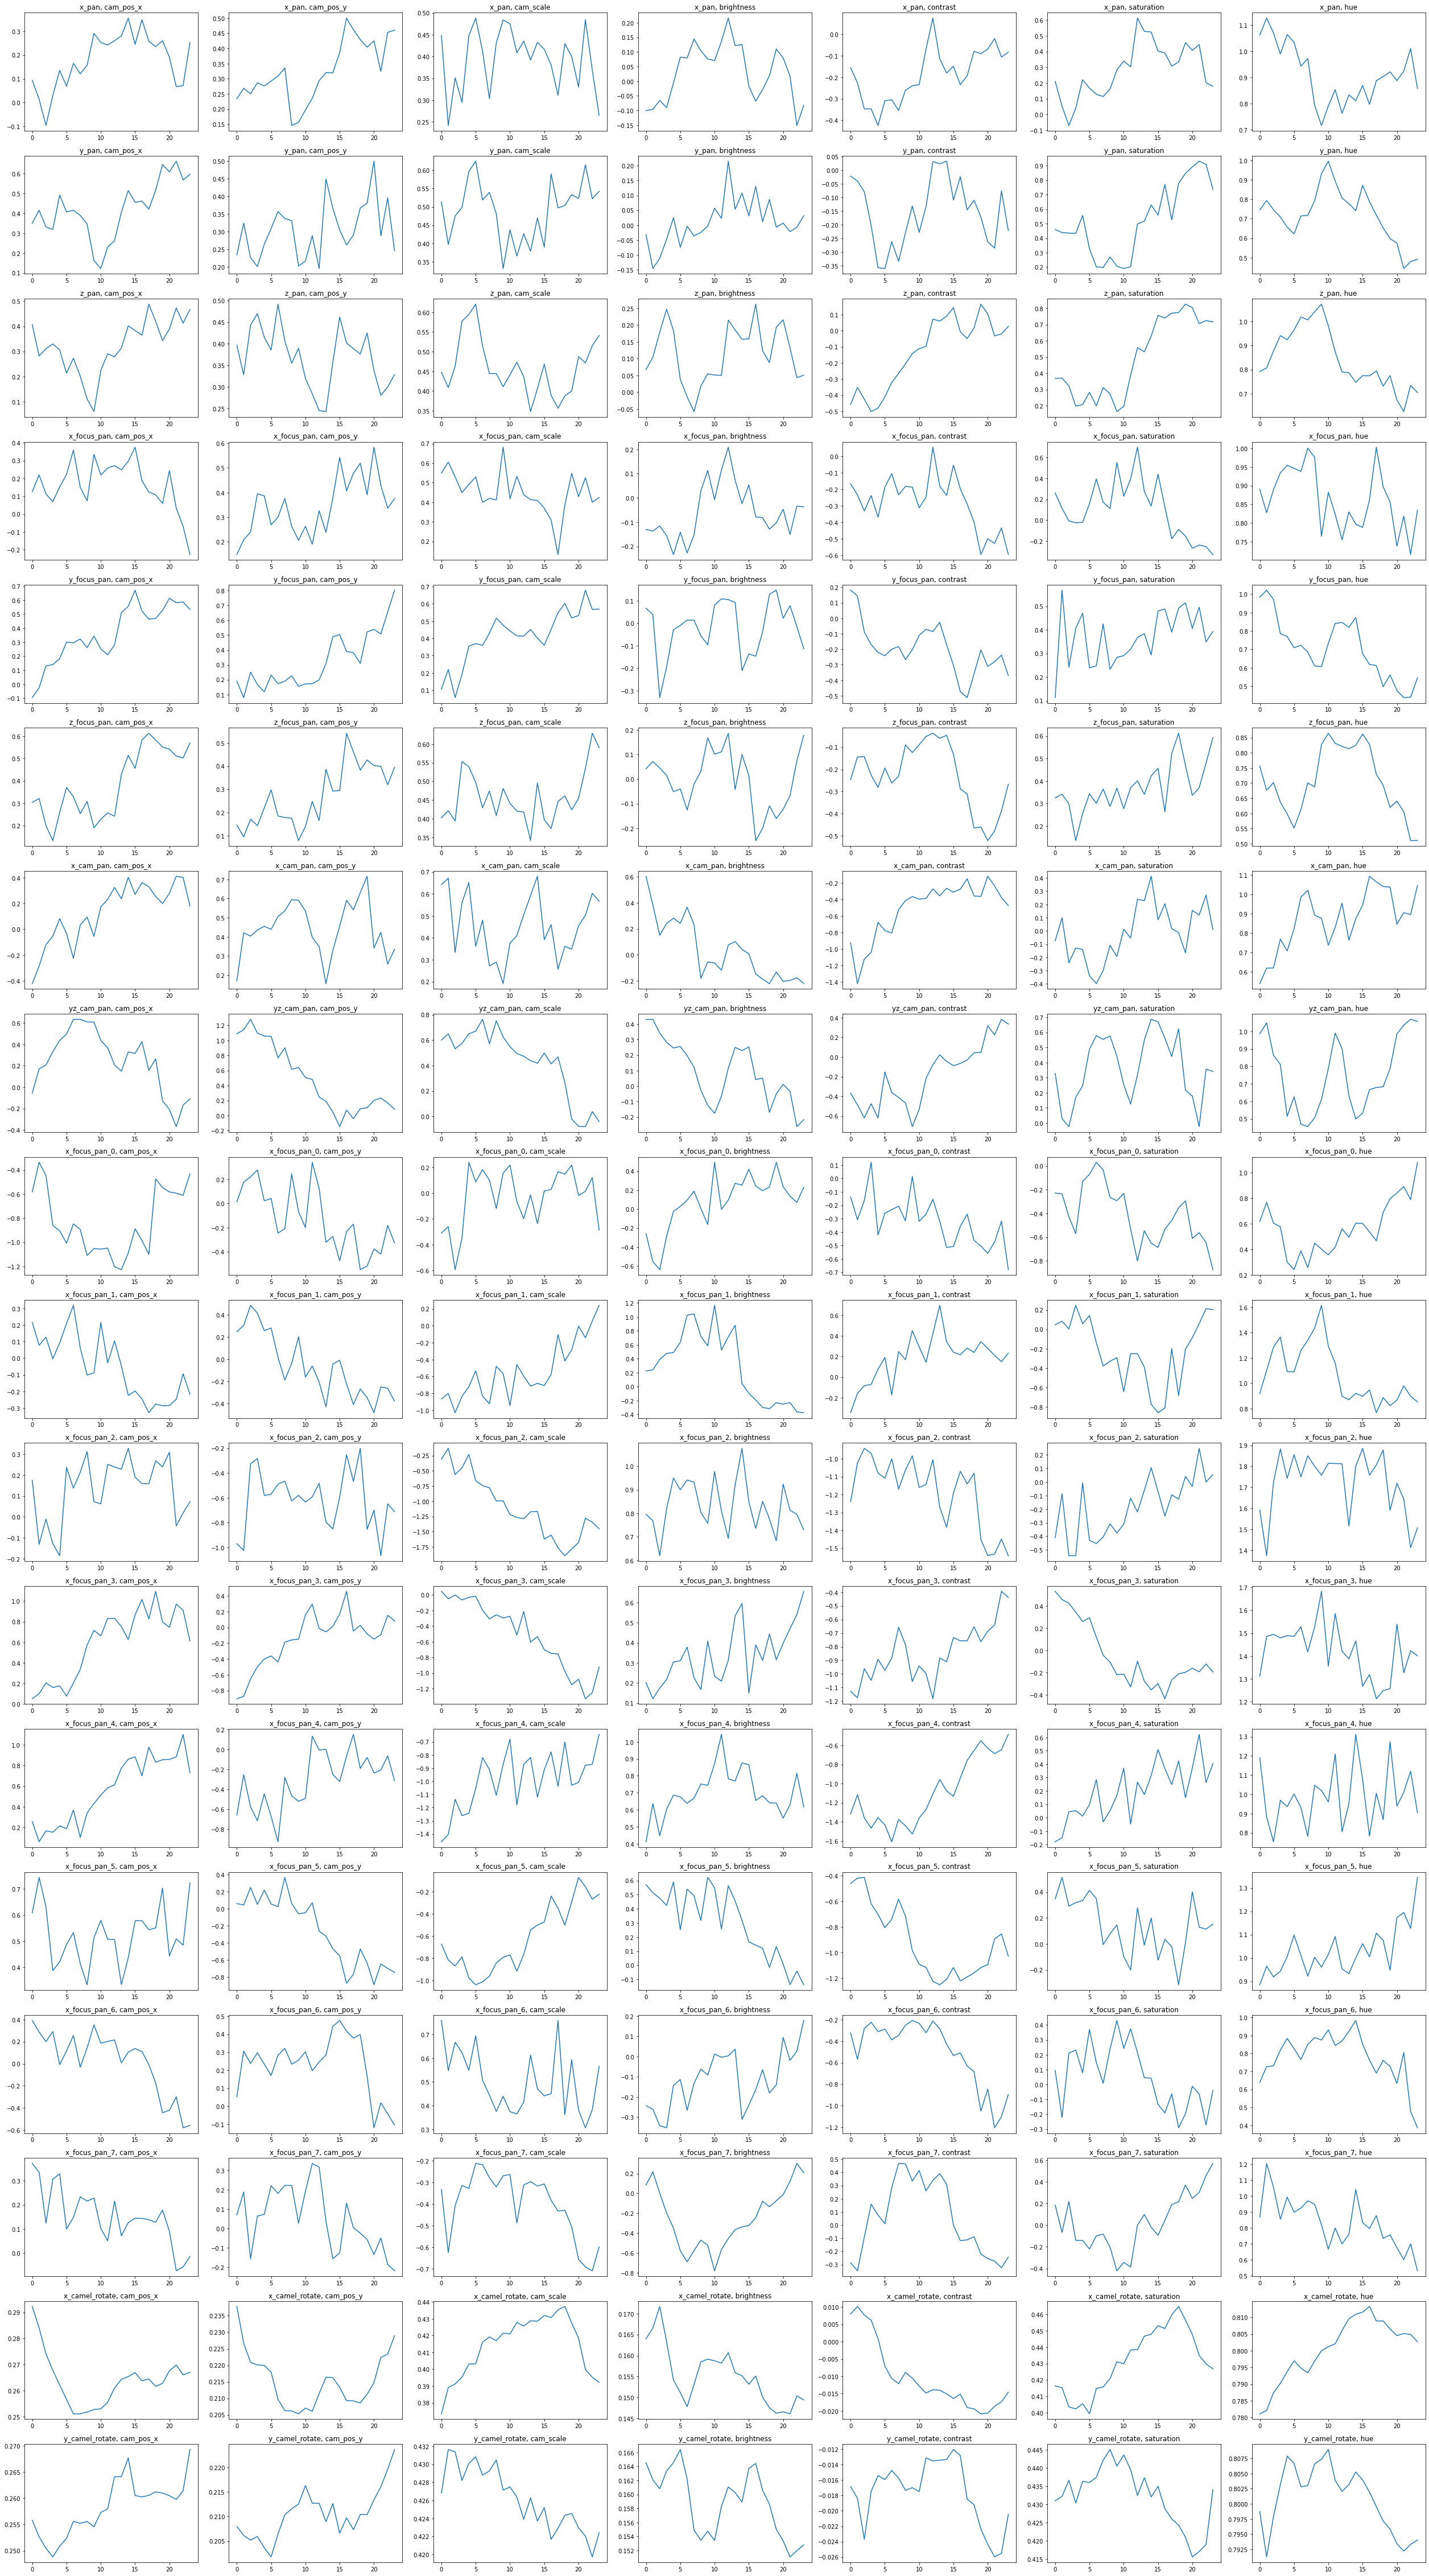

In [8]:
fig, axes = pt.core.subplots(sub_acts.shape[0], sub_acts.shape[-1], (5,3.5))
for i in range(sub_acts.shape[0]):
      for j in range(sub_acts.shape[-1]):
            axes[i,j].plot(np.arange(sub_acts.shape[1]),sub_acts[i,:,j])
            axes[i,j].set_title(f"{acts_configs['mkturk_test']['01']['target_names'][i]}, {embedding_names[j]}")
plt.tight_layout()
plt.show()

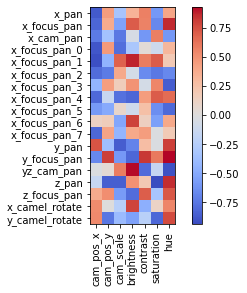

In [19]:
sort_indices = np.array([0,3,6,8,9,10,11,12,13,14,15,1,4,7,2,5,16,17])

sorted_sub_acts = sub_acts[sort_indices]

corr = np.zeros((sorted_sub_acts.shape[0],sorted_sub_acts.shape[-1]))
for i in range(sorted_sub_acts.shape[0]):
      for j in range(sorted_sub_acts.shape[-1]):
            corrcoef = np.corrcoef(np.arange(sorted_sub_acts.shape[1]),sorted_sub_acts[i,:,j])
            corr[i,j] = corrcoef[0,1]
im = plt.imshow(corr, cmap='coolwarm')
plt.colorbar(im)
plt.yticks(np.arange(corr.shape[0]), np.array(acts_configs['mkturk_test']['01']['target_names'])[sort_indices])
plt.xticks(np.arange(corr.shape[1]), embedding_names, rotation=90)
plt.show()

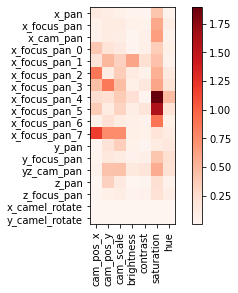

In [21]:
sort_indices = np.array([0,3,6,8,9,10,11,12,13,14,15,1,4,7,2,5,16,17])

sorted_sub_acts = sub_acts[sort_indices]

variances = np.zeros((sorted_sub_acts.shape[0],sorted_sub_acts.shape[-1]))
for i in range(sorted_sub_acts.shape[0]):
      for j in range(sorted_sub_acts.shape[-1]):
            variances[i,j] = np.var(sorted_sub_acts[i,:,j])
im = plt.imshow(variances, cmap='Reds')
plt.colorbar(im)
plt.yticks(np.arange(corr.shape[0]), np.array(acts_configs['mkturk_test']['01']['target_names'])[sort_indices])
plt.xticks(np.arange(corr.shape[1]), embedding_names, rotation=90)
plt.show()

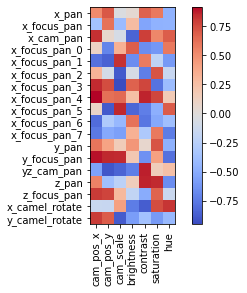

In [13]:
sort_indices = np.array([0,3,6,8,9,10,11,12,13,14,15,1,4,7,2,5,16,17])

sorted_sub_acts = sub_acts[sort_indices]

corr = np.zeros((sorted_sub_acts.shape[0],sorted_sub_acts.shape[-1]))
for i in range(sorted_sub_acts.shape[0]):
      for j in range(sorted_sub_acts.shape[-1]):
            corrcoef = np.corrcoef(np.arange(sorted_sub_acts.shape[1]),sorted_sub_acts[i,:,j])
            corr[i,j] = corrcoef[0,1]
im = plt.imshow(corr, cmap='coolwarm')
plt.colorbar(im)
plt.yticks(np.arange(corr.shape[0]), np.array(acts_configs['mkturk_test']['01']['target_names'])[sort_indices])
plt.xticks(np.arange(corr.shape[1]), embedding_names, rotation=90)
plt.show()

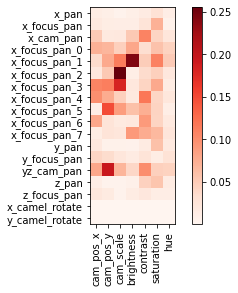

In [23]:
sort_indices = np.array([0,3,6,8,9,10,11,12,13,14,15,1,4,7,2,5,16,17])

sorted_sub_acts = sub_acts[sort_indices]

variances = np.zeros((sorted_sub_acts.shape[0],sorted_sub_acts.shape[-1]))
for i in range(sorted_sub_acts.shape[0]):
      for j in range(sorted_sub_acts.shape[-1]):
            variances[i,j] = np.var(sorted_sub_acts[i,:,j])
im = plt.imshow(variances, cmap='Reds')
plt.colorbar(im)
plt.yticks(np.arange(corr.shape[0]), np.array(acts_configs['mkturk_test']['01']['target_names'])[sort_indices])
plt.xticks(np.arange(corr.shape[1]), embedding_names, rotation=90)
plt.show()